In [18]:
from transformers import pipeline
from PIL import Image

pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Large-hf")
image = Image.open('food_combos/4-cheesecake_strawberry_raspberry/4.JPG')
depth_result = pipe(image)
print(depth_result)


Device set to use cuda:0


{'predicted_depth': tensor([[  1.7288,   1.7289,   1.7325,  ...,  59.9360,  59.4894,  59.4752],
        [  1.7298,   1.7299,   1.7335,  ...,  59.9508,  59.5051,  59.4909],
        [  1.7575,   1.7575,   1.7600,  ...,  60.3534,  59.9308,  59.9173],
        ...,
        [581.2148, 581.2165, 581.2628,  ..., 586.4488, 586.5206, 586.5226],
        [581.1415, 581.1434, 581.1959,  ..., 586.5694, 586.6454, 586.6475],
        [581.1385, 581.1404, 581.1932,  ..., 586.5736, 586.6497, 586.6518]]), 'depth': <PIL.Image.Image image mode=L size=4032x3024 at 0x7EFA94021890>}


install:
transformers
ultralytics
torch
torchvision

# Step 1: Depth Estimation with Depth Anything V2 - Metric Depth Estimation
Use huggingface pipeline to load the model and perform depth estimation on the image.

In [ ]:
from transformers import pipeline
from PIL import Image

depth_estimator = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Metric-Indoor-Large-hf")
output = depth_estimator("food_combos/4-cheesecake_strawberry_raspberry/4.JPG")
output["predicted_depth"].shape
depth_map = output["predicted_depth"].squeeze().numpy() # Remove the batch dimension and convert to numpy array
print(depth_map.shape)

Device set to use cuda:0


(3024, 4032)


Visualize the depth map

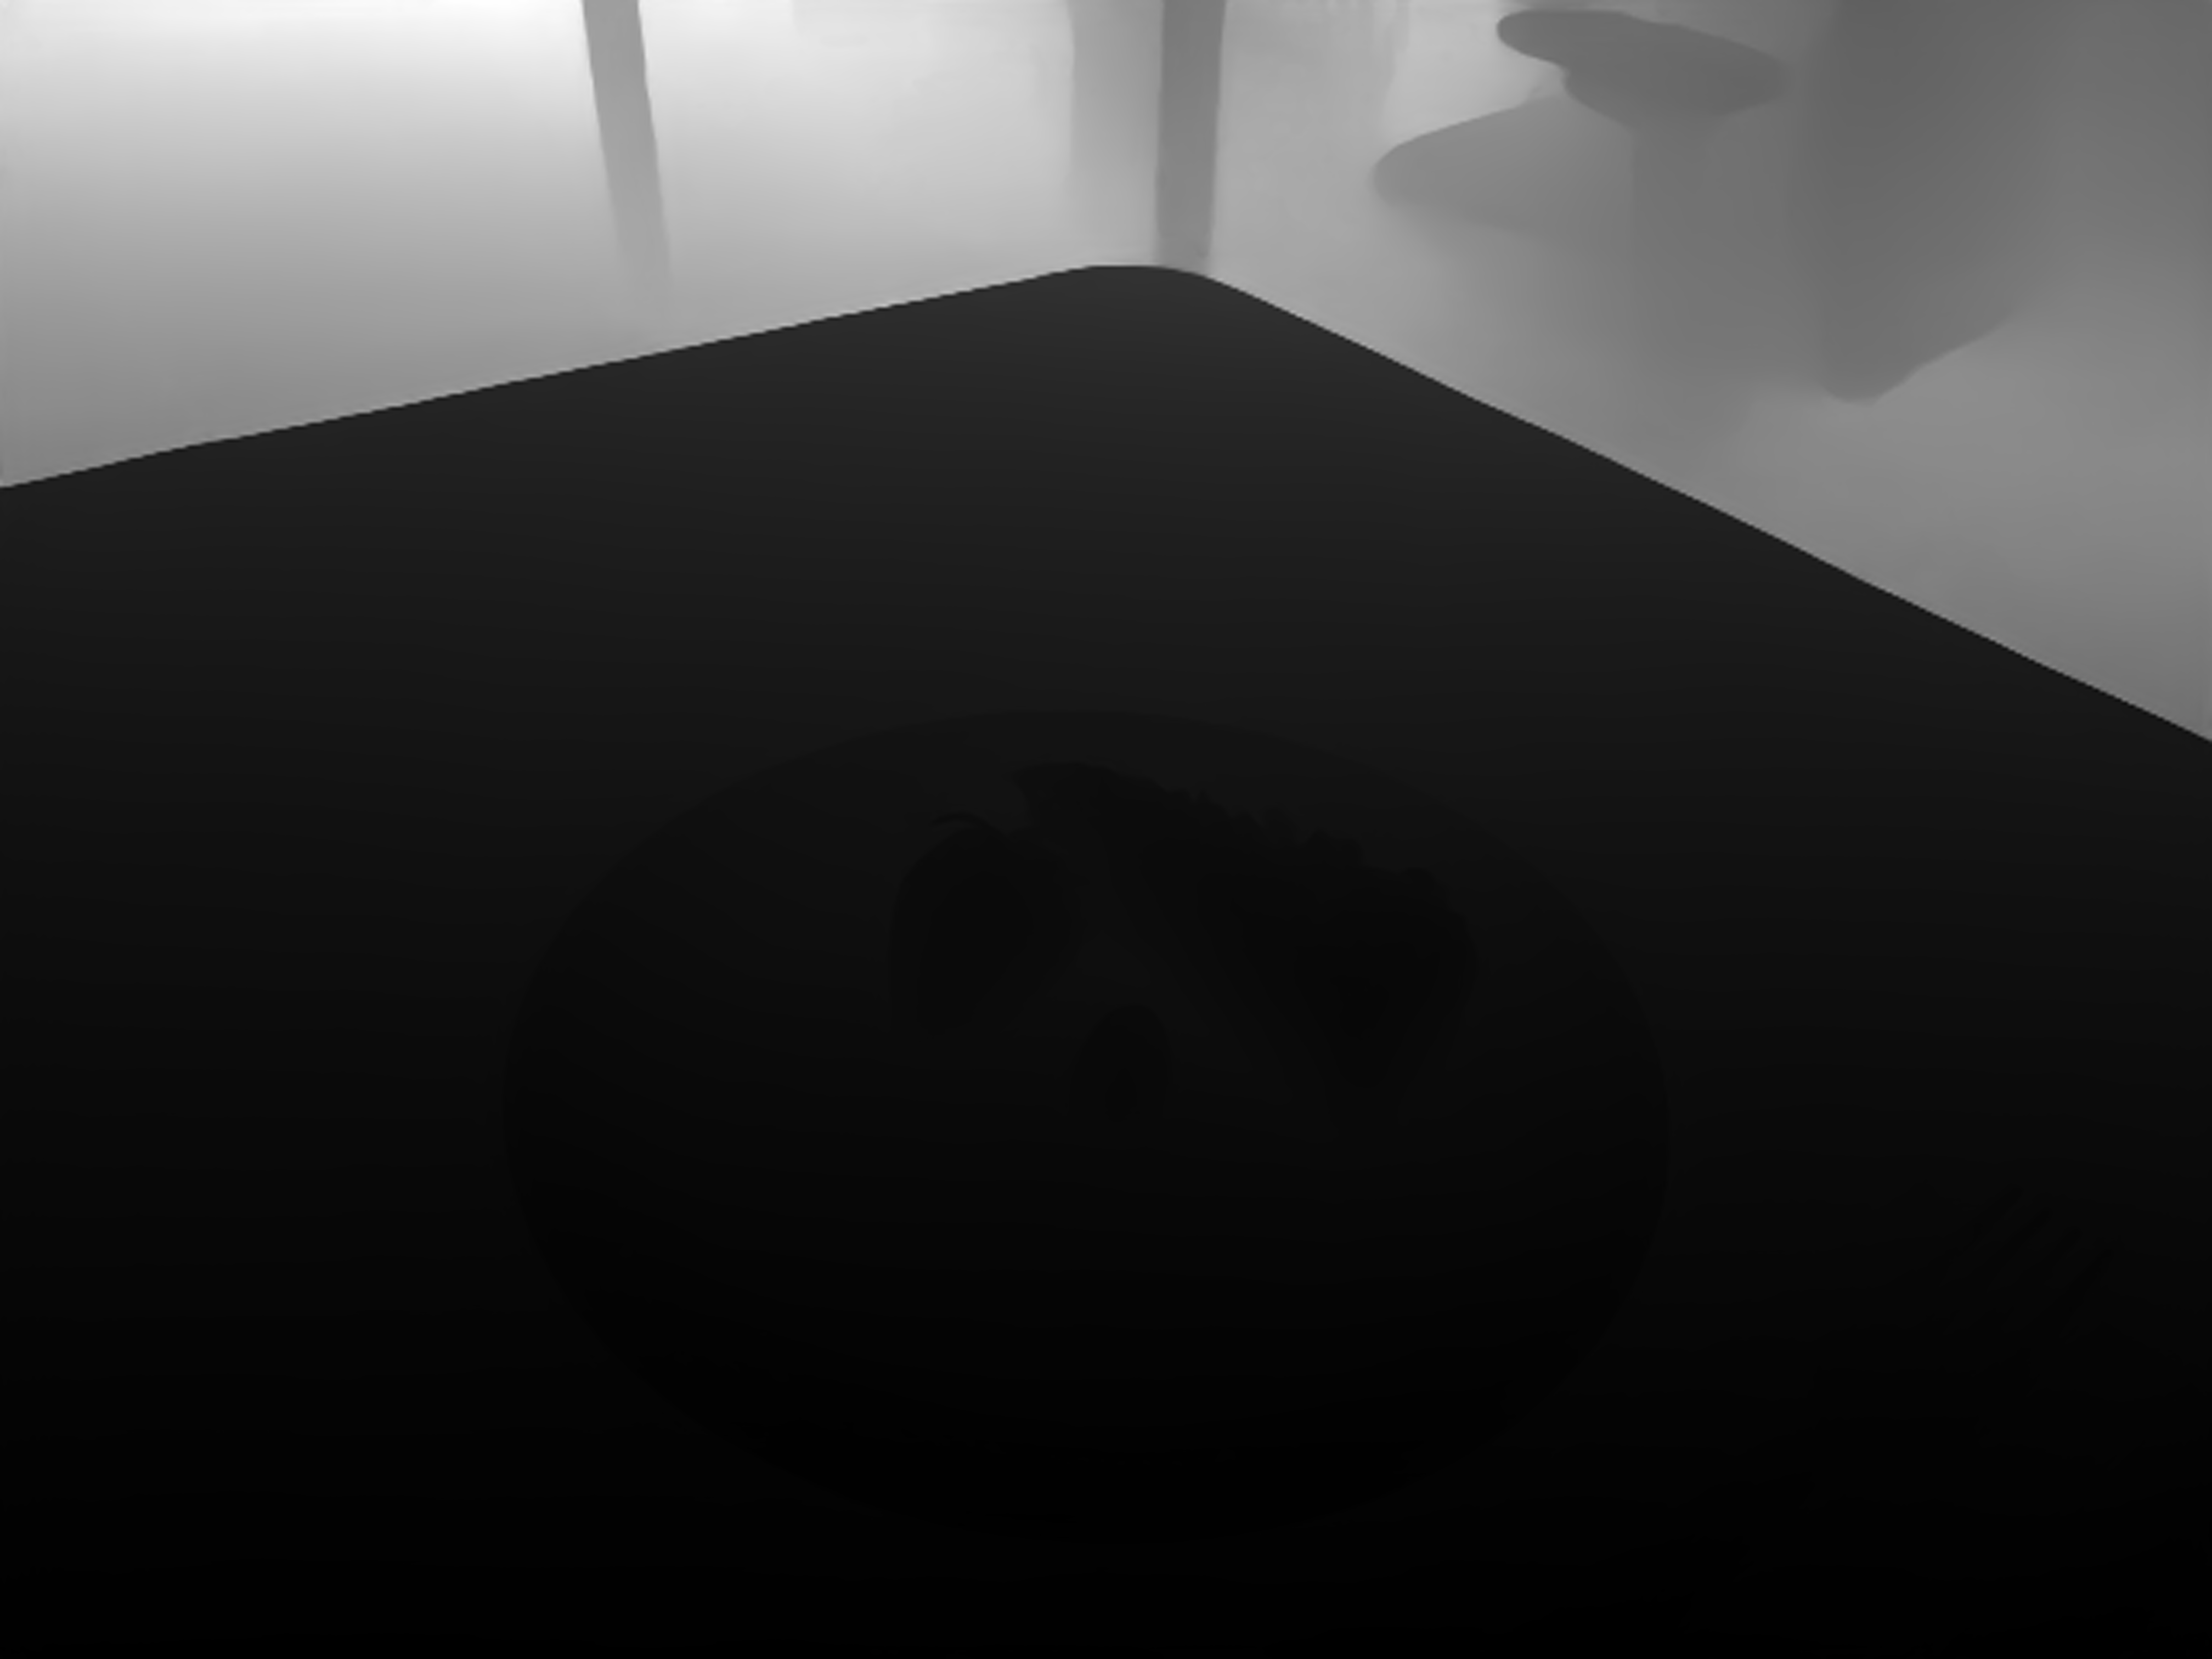

In [20]:
from IPython.display import display
# display(depth_result["depth"])
display(output["depth"])

# Step 2: Segmentation with YOLO
Initialize the YOLO model and perform segmentation on the image.
Can you use HF again?

In [8]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")
results = model("food_combos/4-cheesecake_strawberry_raspberry/4.JPG")

for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    display(result.plot())  # plot results
    # result.show()  # display to screen
    # result.save(filename="result.jpg")  # save to disk


ImportError: cannot import name '__version__' from 'PIL' (unknown location)

In [7]:
from transformers import AutoImageProcessor, DepthAnythingConfig, DepthAnythingForDepthEstimation
import torch
import numpy as np
from PIL import Image
import requests

da_config = DepthAnythingConfig(
    depth_estimation_type="metric",
    max_depth=10,
)

image_processor = AutoImageProcessor.from_pretrained("depth-anything/Depth-Anything-V2-Metric-Indoor-Large-hf")
model = DepthAnythingForDepthEstimation(da_config)

print(model.config)

model = DepthAnythingForDepthEstimation.from_pretrained("depth-anything/Depth-Anything-V2-Metric-Indoor-Large-hf")
# inputs = image_processor(images=image, return_tensors="pt")
# with torch.no_grad():
#     outputs = model(**inputs)
#     predicted_depth = outputs.predicted_depth
# # interpolate to original size  
# (optional)
# prediction = torch.nn.functional.interpolate(
#     predicted_depth.unsqueeze(1),
#     size=image.size[::-1],
#     mode="bicubic",
#     align_corners=False,
# )
# # visualize the prediction
# output = prediction.squeeze().cpu().numpy()
# formatted = (output * 255 / np.max(output)).astype("uint8")
# depth = Image.fromarray(formatted)

ImportError: cannot import name '__version__' from 'PIL' (unknown location)